In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('C:\\Users\\shari\\Desktop\\My projects\\Machine learning projects\\archive\\flipkart.csv')
df.head()

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [4]:
cleaned_df= df.dropna()

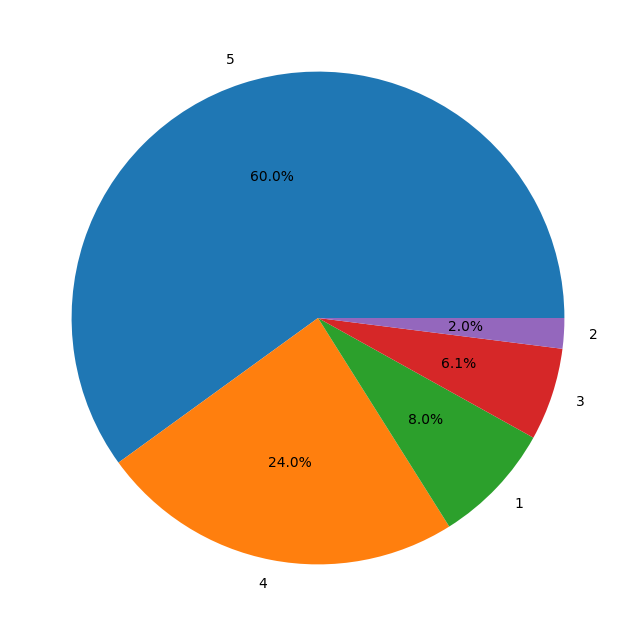

Rating
5    1382
4     552
1     184
3     140
2      46
Name: count, dtype: int64


In [5]:
import matplotlib.pyplot as plt

ratings = cleaned_df['Rating'].value_counts()

numbers = ratings.index
quantity = ratings.values

plt.figure(figsize=(10, 8))

plt.pie(quantity, labels=numbers, autopct='%1.1f%%')

plt.show()

print(ratings)

In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shari\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

data = pd.DataFrame(cleaned_df['Review'])

data['Positive'] = [sid.polarity_scores(i)["pos"] for i in data['Review']]

data['Negative'] = [sid.polarity_scores(i)["neg"] for i in data['Review']]

data['Neutral'] = [sid.polarity_scores(i)["neu"] for i in data['Review']]

data.head()

,Review,Positive,Negative,Neutral
0,Best under 60k Great performanceI got it for a...,0.314,0.073,0.613
1,Good perfomence...,0.744,0.000,0.256
2,Great performance but usually it has also that...,0.119,0.000,0.881
3,My wife is so happy and best product 👌🏻😘,0.568,0.000,0.432
4,"Light weight laptop with new amazing features,...",0.467,0.000,0.533


In [9]:
# Calculate the sum of positive sentiment scores and round the result
x = round(data['Positive'].sum(), 2)

y = round(data['Negative'].sum(), 2)

z = round(data['Neutral'].sum(), 2)

print("Sum of positive sentiment scores:", x)
print("Sum of negative sentiment scores:", y)
print("Sum of neutral sentiment scores:", z)

Sum of positive sentiment scores: 835.67
Sum of negative sentiment scores: 104.92
Sum of neutral sentiment scores: 1363.41


C:\Users\shari\AppData\Local\Temp\ipykernel_4692\2187177416.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sentiment')


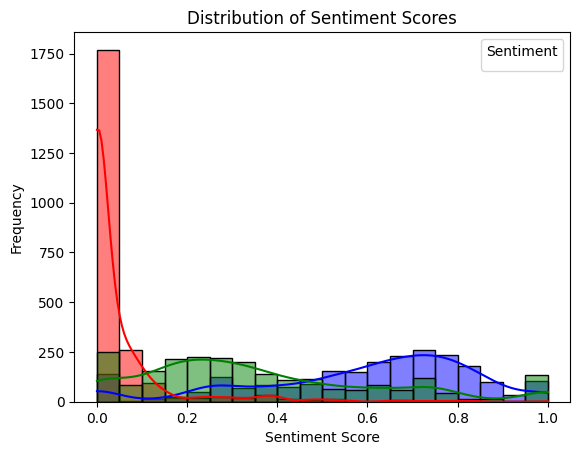

In [10]:
import seaborn as sns
sns.histplot(data, bins=20, kde=True, hue_order=['Positive', 'Negative', 'Neutral'], palette=['green', 'red', 'blue'])
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.legend(title='Sentiment')
plt.show()

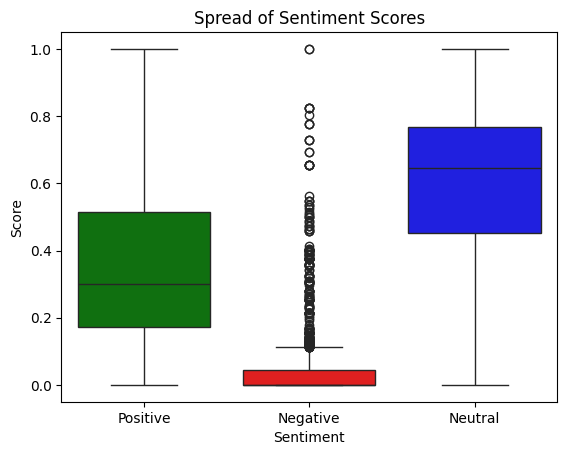

In [11]:
# Create a box plot
sns.boxplot(data=data, palette=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.title('Spread of Sentiment Scores')
plt.show()

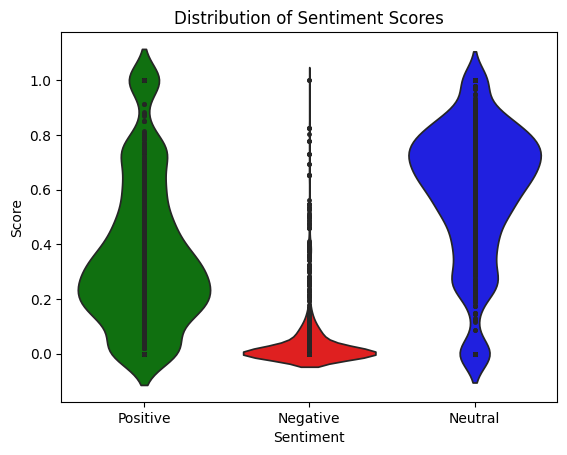

In [12]:
sns.violinplot(data=data, inner='point', palette=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.title('Distribution of Sentiment Scores')
plt.show()

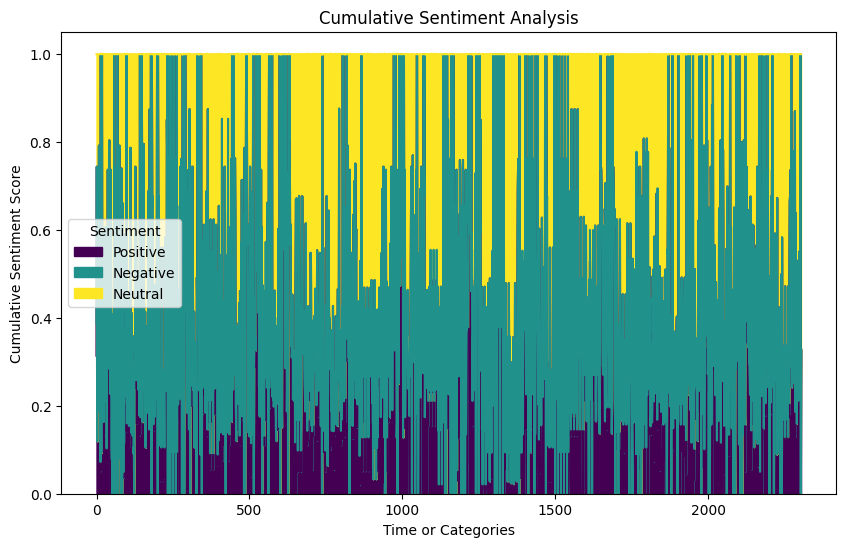

In [13]:
data.plot.area(stacked=True, figsize=(10, 6), colormap='viridis')
plt.xlabel('Time or Categories')
plt.ylabel('Cumulative Sentiment Score')
plt.title('Cumulative Sentiment Analysis')
plt.legend(title='Sentiment')
plt.show()